# Project Description:

The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, the goal is to group customers into distinct segments. This segmentation can inform targeted marketing strategies, improve customer satisfaction, and enhance overall business strategies.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset
df = pd.read_csv("ifood_df.csv")
df.sample(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2125,58482.0,0,1,59,576,7,115,19,7,7,...,0,0,0,0,0,0,1,724,717,1
1065,54233.0,0,1,46,652,8,158,21,0,142,...,0,0,0,0,1,0,0,839,697,0
162,52074.0,0,1,77,59,0,12,0,0,48,...,0,0,0,0,1,0,0,71,23,1
1924,51141.0,0,0,96,144,0,7,0,0,6,...,0,0,0,0,0,0,1,151,145,0
16,37760.0,0,0,20,84,5,38,150,12,28,...,1,0,0,0,1,0,0,289,261,0


In [3]:
# Column names
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [4]:
df.shape # we have 2205 rows and 39 columns

(2205, 39)

In [5]:
# making copy of DataFrame
df_copy = df.copy()

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

All Colmuns are in appropriate dtype so no need to change them.

In [7]:
# looking for missing values
df_copy.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [8]:
df_copy.duplicated().sum()

184

- There are no missing values in this data.
- There are 184 duplicate values in this data.

In [9]:
# Removing duplicate values.
df_copy.drop_duplicates(inplace=True)

In [10]:
df_copy.duplicated().sum()

0

In [11]:
# checking unique values in data
df_copy.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

Z_CostContact and Z_Revenue has same values 

In [12]:
df_copy["Z_CostContact"].value_counts()

3    2021
Name: Z_CostContact, dtype: int64

In [13]:
df_copy["Z_Revenue"].value_counts()

11    2021
Name: Z_Revenue, dtype: int64

- All values in Z_CostContact are '3s'
- All values in Z_Revenue are '11s'
- So we can drop this columns as it hold same values throughout.

In [14]:
df_copy.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

# EDA 

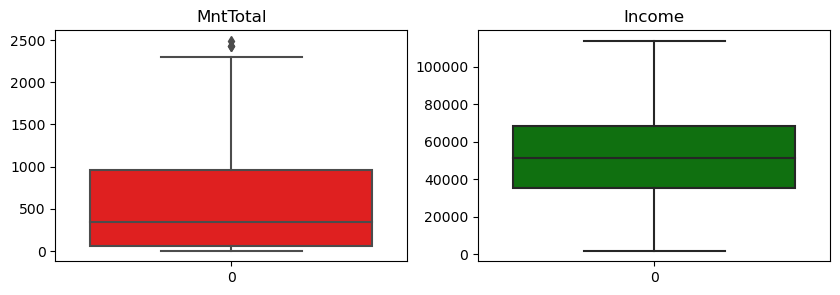

In [15]:
# Plotting box plot
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.boxplot(df_copy["MntTotal"], color="red")
plt.title("MntTotal")

plt.subplot(1,2,2)
sns.boxplot(df_copy["Income"], color="green")
plt.title("Income")

plt.show()

- MnTotal has outliers, so let treat it
- No outliers in Income column

In [16]:
# Identifying outliers
Q1 = df_copy["MntTotal"].quantile(0.25)
Q3 = df_copy["MntTotal"].quantile(0.75)

IQR = Q3-Q1

lower_bond = Q1 - (1.5) * (IQR)
upper_bond = Q3 + (1.5) * (IQR)
outlier = df_copy[(df_copy["MntTotal"]>lower_bond)&(df_copy["MntTotal"]>upper_bond)]
outlier.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [17]:
# Removeing outlier
df_copy = df_copy[(df_copy["MntTotal"]>=lower_bond)&(df_copy["MntTotal"]<=upper_bond)]

In [18]:
df_copy.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,...,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,51630.820119,0.444004,0.510406,48.893954,305.178394,26.199703,164.996036,37.518335,27.093162,43.875619,...,0.251734,0.034688,0.090684,0.024281,0.502478,0.165015,0.217542,560.985629,517.110010,0.300297
std,20676.523136,0.536322,0.546445,28.964198,336.123164,39.563725,218.284750,54.888293,41.356022,51.690029,...,0.434117,0.183033,0.287230,0.153960,0.500118,0.371286,0.412677,572.595924,550.571315,0.678306
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35395.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51400.500000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68138.000000,1.000000,1.000000,74.000000,505.000000,33.000000,227.750000,50.000000,33.750000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,882.250000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


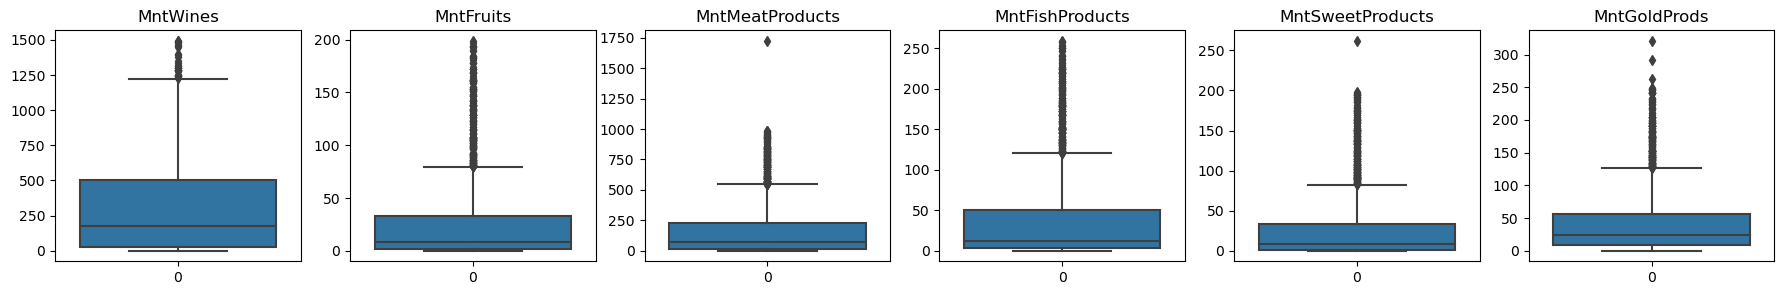

In [19]:
# Plotting box plot for different products
plt.figure(figsize=(45,3))

plt.subplot(1,12,1)
sns.boxplot(df_copy["MntWines"])
plt.title("MntWines")

plt.subplot(1,12,2)
sns.boxplot(df_copy["MntFruits"])
plt.title("MntFruits")

plt.subplot(1,12,3)
sns.boxplot(df_copy["MntMeatProducts"])
plt.title("MntMeatProducts")

plt.subplot(1,12,4)
sns.boxplot(df_copy["MntFishProducts"])
plt.title("MntFishProducts")

plt.subplot(1,12,5)
sns.boxplot(df_copy["MntSweetProducts"])
plt.title("MntSweetProducts")

plt.subplot(1,12,6)
sns.boxplot(df_copy["MntGoldProds"])
plt.title("MntGoldProds")

plt.show()

We will keep this outliers because some products can be costlier than other depending on there need in market

# Histogram of Income

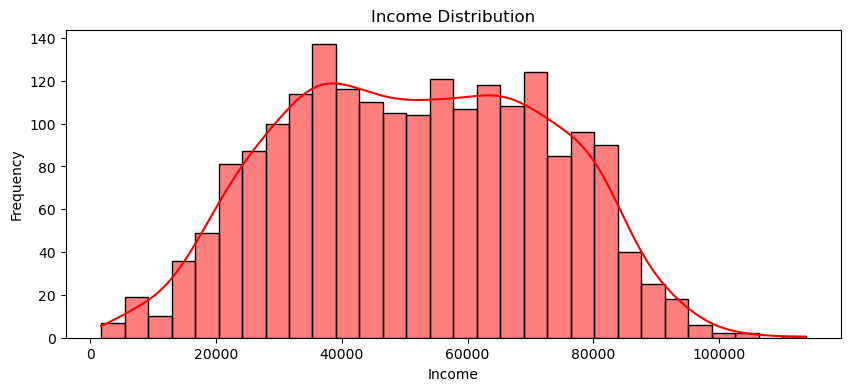

In [20]:
# Histogram of Income
plt.figure(figsize=(10,4))
sns.histplot(df_copy["Income"], bins=30 ,kde=True, color="red")
plt.title('Income Distribution')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

Income follows Normal distribution that is bell shap curve with no outliers

# Histogram of Age

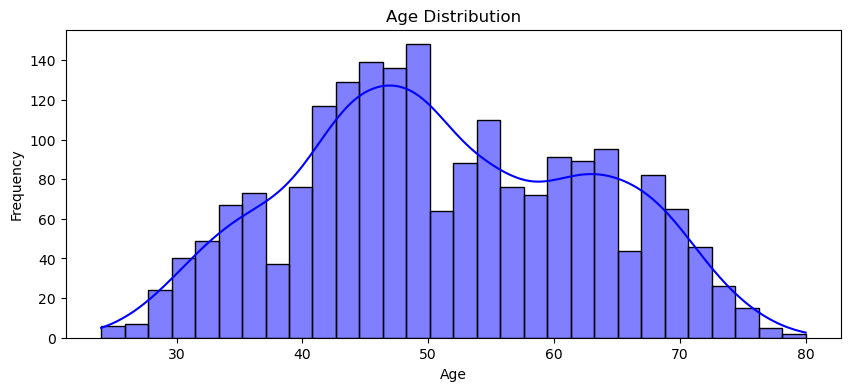

In [21]:
# Histogram of Age
plt.figure(figsize=(10,4))
sns.histplot(df_copy["Age"], bins=30 ,kde=True, color="blue")
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [22]:
print("Skewness: %f" % df_copy['Age'].skew())
print("Kurtosis: %f" % df_copy['Age'].kurt())

Skewness: 0.093621
Kurtosis: -0.800800


- Age has almost normal distribution i.e left and right side of distribution are roughly equal or symmetric
- Skewness is 0.093 that is close to 0 i.e tails are lighter
- Kurtosis is -0.8 that is close to 0 i.e peaks are smoth

### Fetching information about martial status of customer

In [23]:
# function to fetch Martial status
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'

In [24]:
# Making column that hold relationship data
df_copy['marital_status']=df_copy.apply(get_marital_status, axis=1)
df_copy["marital_status"]

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2198      Single
2200     Married
2202    Divorced
2203    Together
2204     Married
Name: marital_status, Length: 2018, dtype: object

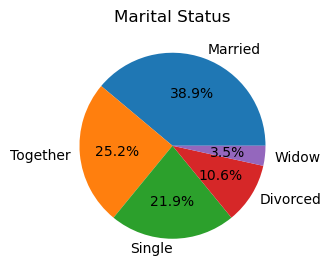

In [25]:
# Pie chart for marital_status
plt.figure(figsize=(3,4))
df_copy["marital_status"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title('Marital Status')
plt.show()

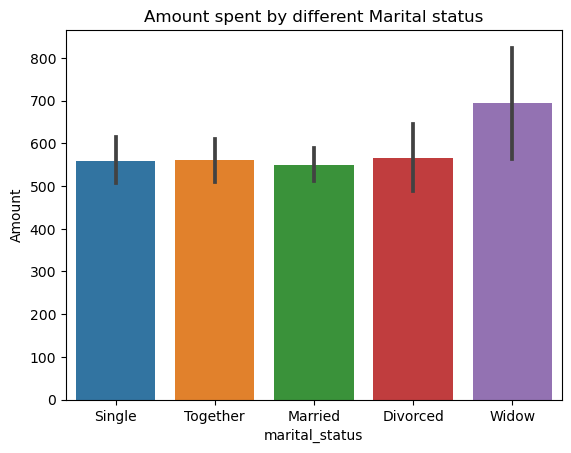

In [26]:
# Ploting barplot
sns.barplot(x=df_copy["marital_status"], y=df_copy["MntTotal"])
plt.xlabel("marital_status")
plt.ylabel("Amount")
plt.title("Amount spent by different Marital status")
plt.show()

In [27]:
# count of people according to marital status
df_copy["marital_status"].value_counts()

Married     785
Together    508
Single      441
Divorced    214
Widow        70
Name: marital_status, dtype: int64

- We can say widows are less in number that is 70 which is 3.5% but they are the one who spent more money
- Reset all marital_status spent almost same amount of money

In [28]:
# Creating new feature to get total products purchased in deals
df_copy['NumTotalPurchases'] = df_copy['NumDealsPurchases'] + df_copy['NumWebPurchases'] + df_copy['NumCatalogPurchases'] + df_copy['NumStorePurchases']

##### Making new feature which would be 1 if customer is married or together else it would be 0 representing single or divorced or widow

In [29]:
def in_relationship(df_x):
    if (df_x["marital_status"]=="Married") or (df_x["marital_status"]=="Together"):
        return 1
    else:
        return 0

In [30]:
df_copy["in_relationship"] = df_copy.apply(in_relationship, axis=1)

In [31]:
df_copy.iloc[:,33:]

,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,NumTotalPurchases,in_relationship
0,0,1529,1441,0,Single,25,0
1,0,21,15,0,Single,6,0
2,0,734,692,0,Together,21,1
3,0,48,43,0,Together,8,1
4,1,407,392,0,Married,19,1
...,...,...,...,...,...,...,...
2198,0,19,16,0,Single,4,0
2200,0,1094,847,0,Married,18,1
2202,0,1217,1193,1,Divorced,19,0
2203,0,782,721,0,Together,23,1


## Standardization
Value of Income, MnTotal, in_relationship are in different scale, so higher values can get more importance and models output would be bias. So we will used StandardScaler to perform standardization.
Here mean of data is 0 and Standard deviation is 1

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_for_clustering = ['Income', 'MntTotal', 'in_relationship']

df_scaled = df_copy.copy()

df_scaled[cols_for_clustering] = scaler.fit_transform(df_copy[cols_for_clustering])
df_scaled[cols_for_clustering].describe()

,Income,MntTotal,in_relationship
count,2.018000e+03,2.018000e+03,2.018000e+03
mean,1.293976e-16,-2.464717e-17,1.936563e-17
std,1.000248e+00,1.000248e+00,1.000248e+00
min,-2.414003e+00,-9.729788e-01,-1.335458e+00
25%,-7.854243e-01,-8.838887e-01,-1.335458e+00
50%,-1.114197e-02,-3.807915e-01,7.488067e-01
75%,7.985516e-01,7.005180e-01,7.488067e-01
max,3.004305e+00,3.044811e+00,7.488067e-01


Here mean is almot 0 and Standard deviation is amost 1

In [33]:
# features selection
X =  df_scaled[["Income", "MntTotal", "in_relationship"]]

In [34]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

K_MAX = 15 # maximum numbers of K
wsse = [] #list to store wsse values

for i in range(1, K_MAX):
    model = KMeans(n_clusters = i, random_state = 10)
    model.fit(X)
    wsse.append(model.inertia_)

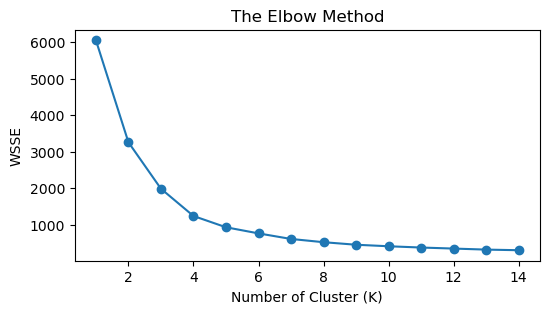

In [35]:
# Stores range of number of K
number_of_K = range(1, K_MAX)

# Ploting Elbow Plot to find optimal number of 
plt.figure(figsize=(6,3))
plt.plot(number_of_K, wsse)
plt.scatter(number_of_K,wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('WSSE')
plt.show()

Elbow plot suggest values between 4 and 5, so lets use Silhouette score analysis to find optimal number of K

In [36]:
from sklearn.metrics import silhouette_score

silhouette_list = []
for K in range(2,K_MAX+1):
    model = KMeans(n_clusters = K, random_state=10)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

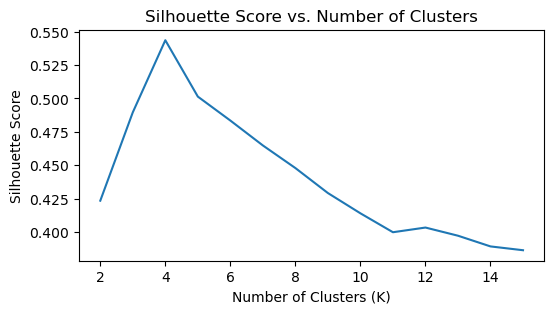

In [37]:
plt.figure(figsize=[6,3])
plt.plot(range(2,K_MAX+1), silhouette_list)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

The highest silhouette score is for 4 clusters.

In [38]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4,  random_state = 10)
kmeans.fit(X)
Y_pred = kmeans.predict(X)

In [39]:
Y_pred

array([3, 2, 1, ..., 3, 1, 0])

We have four cluster as 0,1,2, and 3

In [40]:
print(df_copy.shape)
print(df_scaled.shape)

(2018, 40)
(2018, 40)


In [41]:
# adding Predicted values for DataFram
df_scaled["Clusters"]=Y_pred
df_copy.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,NumTotalPurchases,in_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,Single,25,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,Single,6,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,Together,21,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,Together,8,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,Married,19,1
5,62513.0,0,1,16,520,42,98,0,42,14,...,0,0,1,0,702,688,0,Together,22,1
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,1,0,0,563,536,0,Divorced,21,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,0,1,146,123,0,Married,10,1
8,30351.0,1,0,19,14,0,24,3,3,2,...,0,0,0,1,44,42,0,Together,6,1
9,5648.0,1,1,68,28,0,6,1,1,13,...,0,0,0,1,36,23,1,Together,2,1


In [42]:
df_scaled.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'marital_status', 'NumTotalPurchases', 'in_relationship', 'Clusters'],
      dtype='object')

### Principal Component Analysis (PCA) for Visulaization

In [43]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(df_scaled[cols_for_clustering])
df_scaled['pc1'] = pca_res[:,0]
df_scaled['pc2'] = pca_res[:,1]

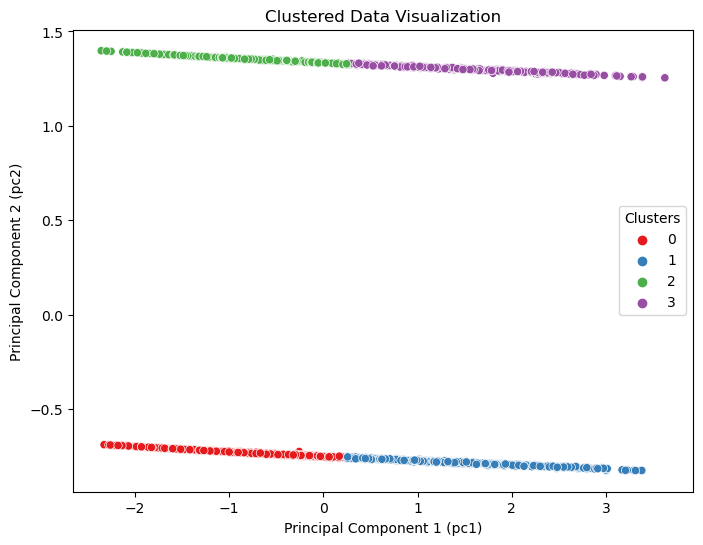

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=df_scaled, hue='Clusters', palette='Set1')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')
plt.show()

### Exploring data with respect to clusters

In [45]:
df_copy["Clusters"]=df_scaled["Clusters"]

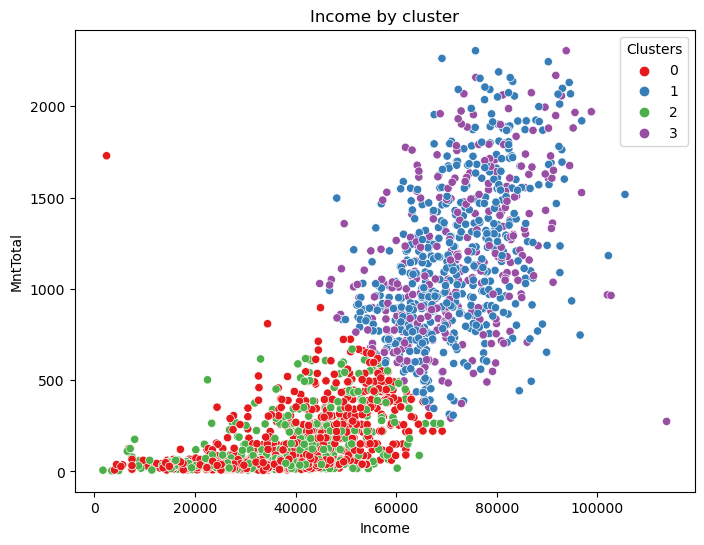

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df_copy, hue = 'Clusters', palette='Set1')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

plt.show()

### Amount spent with respect to clusters

In [47]:
Amount_col= ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [48]:
mnt_data = df_copy.groupby("Clusters")[Amount_col].mean().reset_index()
mnt_data

,Clusters,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,161.358056,136.296675,93.957801,7.737852,40.170077,11.419437,8.072890,25.061381
1,1,1153.931507,1083.978474,623.872798,52.825832,345.532290,76.279843,55.420744,69.953033
2,2,153.056872,127.222749,87.421801,7.781991,39.120853,10.973934,7.758294,25.834123
3,3,1160.521452,1086.940594,616.118812,54.594059,357.996700,76.475248,55.336634,73.580858


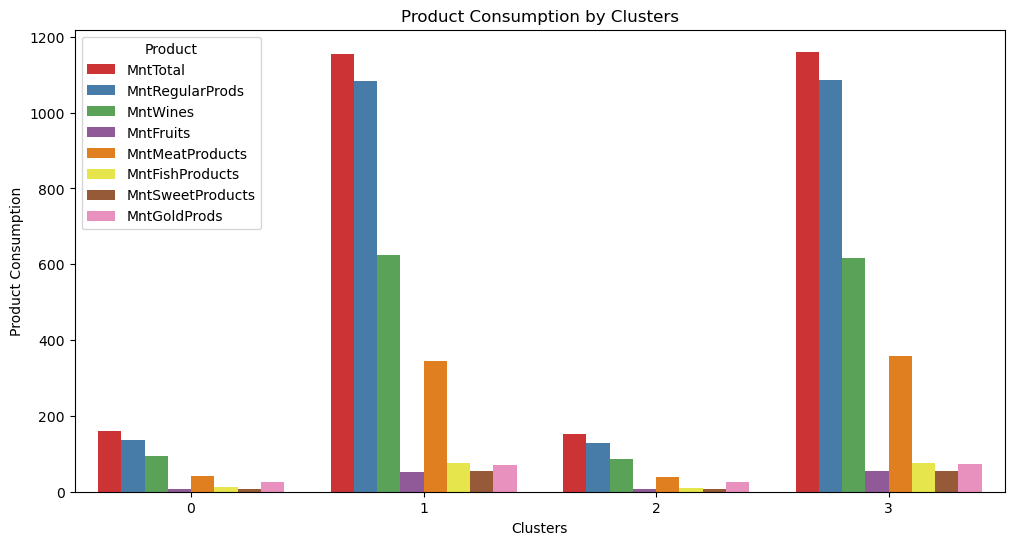

In [49]:
melted_data = pd.melt(mnt_data, id_vars="Clusters", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Clusters", y="Consumption", hue="Product", data=melted_data, palette='Set1')
plt.title("Product Consumption by Clusters")
plt.xlabel("Clusters")
plt.ylabel("Product Consumption")
plt.legend(title="Product", loc="upper left")
plt.show()

- Cluster 0 & 2 have the lowest spending across all product categories. These two clusters are almost identical in consumption patterns.
- Cluster 1 & 3 have the high spending with respect to total amount spent. These two clusters have high consumption of wine and meat as spend is high in that segment.

### Comparing In_relationship feature and cluster

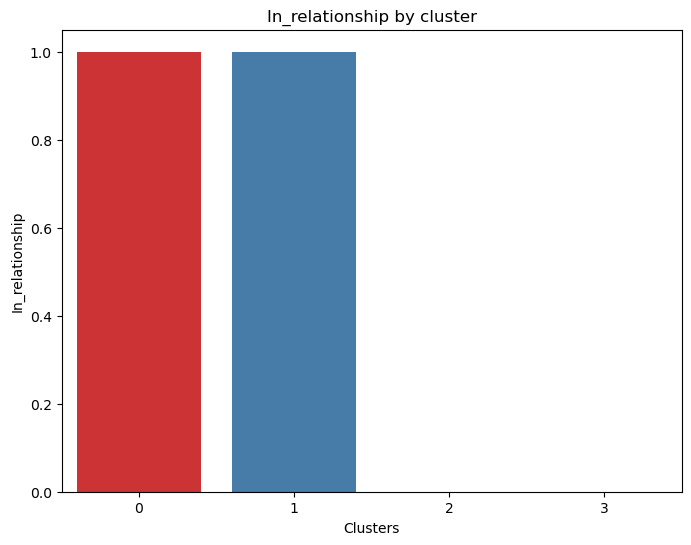

In [50]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Clusters", y='in_relationship', data=df_copy, palette='Set1')
plt.title('In_relationship by cluster')
plt.xlabel('Clusters')
plt.ylabel('In_relationship')
plt.show()

- Cluster 0 and 1 consist of people who are in relationship.
- Cluster 2 and 3 consist of people who are single or divorced.

### Cluster sizes

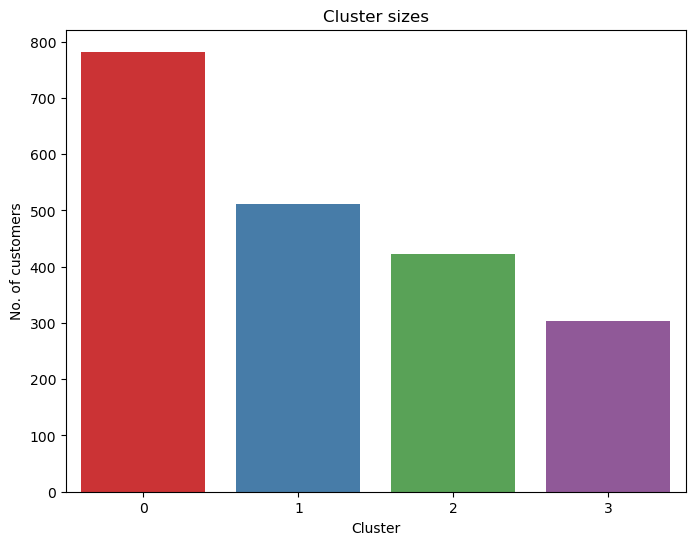

In [51]:
#data with respect to cluster size
cluster_sizes = df_copy.groupby('Clusters')[['MntTotal']].count().reset_index()

#ploting bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='Clusters', y='MntTotal', data=cluster_sizes, palette='Set1')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('No. of customers')
plt.show()

In [52]:
# Percent wise distribution of customers with respect to cluster
total_rows = len(df_copy)
cluster_sizes["Percentage distribution"] = round(cluster_sizes["MntTotal"] / total_rows*100,0)
cluster_sizes

,Clusters,MntTotal,Percentage distribution
0,0,782,39.0
1,1,511,25.0
2,2,422,21.0
3,3,303,15.0


- Cluster 0: It is the largest cluster with 782 customers that contributes to 39% of over all data.
- Cluster 1: Its is second largest with 511 customers that contributes to 25% of over all data.
- Cluster 2: This cluster holds third position with 422 customers that contributes to 21% of over all data which is close to cluster 1.
- Cluster 3: Its is cluster with lowest size and hold 303 customers that contributes to 15% of over all data.

**____________________________________________________________________________________________________________________________**

# Insights

#### Product Consumption Across Clusters:
- **Cluster 0 & 2:** Have the lowest spending across all product categories, especially for wine and meat products. These two clusters are almost identical in consumption patterns.
- MntTotal(Amount spent) for Cluster 0: ~161.
- MntTotal(Amount spent) for Cluster 2: ~153.

- **Cluster 1 & 3:** Show significantly higher spending across all categories, especially on wine, meat, and regular products.
- MntTotal for Cluster 1: ~1154.
- MntTotal for Cluster 3: ~1160.
- Wine and Meat Products are the highest contributors to total spending in these clusters.

#### Cluster Characteristics Based on Income and Spending:
- **Cluster 0 & 2:** Represent customers with relatively lower income and total spending. These could be cost-conscious customers or those with less purchasing power.

- **Cluster 1 & 3:** Represent high-income customers with high spending on products, especially wine and meat products. These clusters are likely made up of the company's most valuable customers in terms of total spending.

**____________________________________________________________________________________________________________________________**

## High-Spending Segments (Clusters 1 & 3):
Customers in these clusters represent high-value segments. They are likely to respond well to **premium or targeted marketing campaigns, particularly those focused on wine and meat products**.
## Low-Spending Segments (Clusters 0 & 2):
These customers might benefit from **promotions or discounts**, especially on lower-priced products. **Marketing efforts should focus on increasing engagement and cross-selling opportunities within these segments**.

**____________________________________________________________________________________________________________________________**

# Recommendations

#### Relationship Status:
Customers in relationships tend to belong to the higher-spending clusters(cluster 1 and 3). **Promotions targeting families or couples might be more effective for these clusters.**

#### Targeted Marketing Campaigns:
- Focus premium product marketing (especially wine and meat) on Clusters 1 and 3.
- Offer promotions or bundles to encourage more purchases from Clusters 0 and 2.

#### Loyalty Programs:
Implement loyalty or membership programs for Clusters 1 and 3 to enhance customer retention.

#### Personalized Offers:
Create personalized offers based on the customer's relationship status and previous spending behavior.